<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Introduction to Machine Learning <br>
<font color=696880 size=4>
<!-- <br> -->
CE 40477 - Fall 2024

<font color=GREEN size=5>
<br>
Mahan Bayhaghi & Hamidreza Gandomi

This version is revised and changed by Abolfazl Delavar
<!-- <br> -->

____


# Section 1

In this section, we would like to visualize why using techniques of linear regression (using SSE cost function) fails in linear classification:

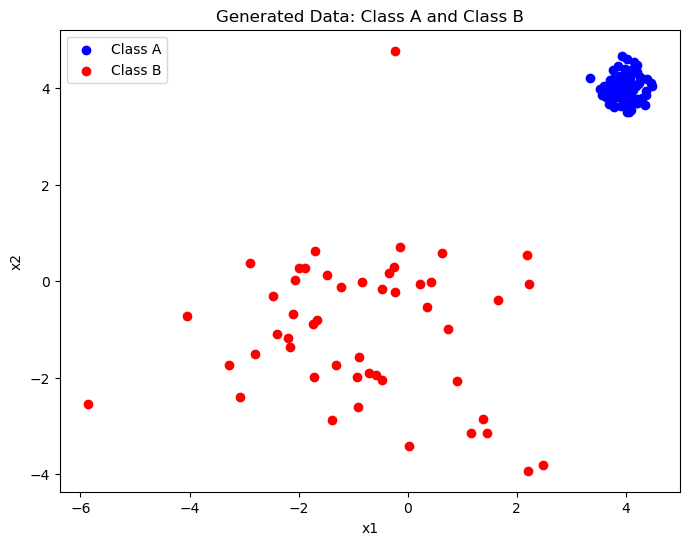

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# The BLUE density points are created here
class_A = np.random.normal(loc=(4, 4), scale=0.25, size=(100, 2))
labels_A = np.ones(class_A.shape[0])

# The RED density points are created here
class_B = np.random.normal(loc=(-1, -1), scale=1.5, size=(50, 2))
labels_B = np.zeros(class_B.shape[0])


X = np.vstack((class_A, class_B))
y = np.hstack((labels_A, labels_B))

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.title("Generated Data: Class A and Class B")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

As you can see, the data points are linearly separable in many ways. Now let's fit a line to them:

Model weights: w1 = 0.08, w2 = 0.11, bias = 0.22


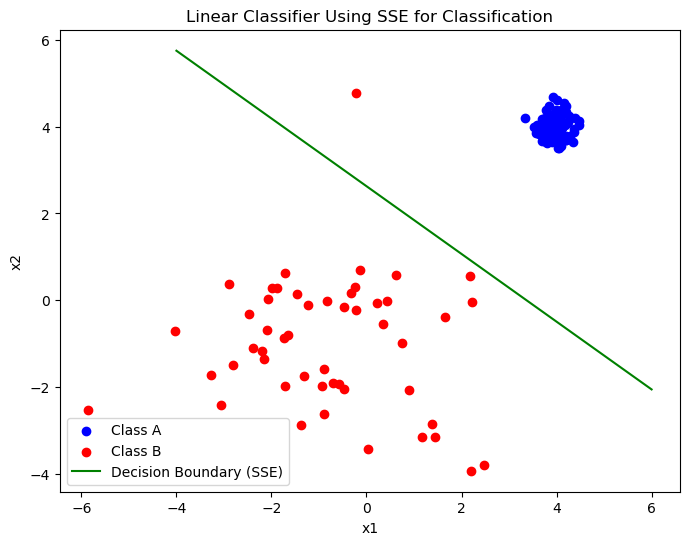

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

w1, w2 = model.coef_  # weights
w0 = model.intercept_  # bias

print(f"Model weights: w1 = {w1:.2f}, w2 = {w2:.2f}, bias = {w0:.2f}")

# Plot the decision boundary: w1 * x1 + w2 * x2 + b = 0.5
# In the above equation, why the value of 0.5 is used in the right hand side of the equation?!!?!?
x_vals = np.linspace(-4, 6, 100)
decision_boundary = (-w1 * x_vals - w0 + 0.5) / w2

plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], label='Class A', color='blue')
plt.scatter(class_B[:, 0], class_B[:, 1], label='Class B', color='red')
plt.plot(x_vals, decision_boundary, label='Decision Boundary (SSE)', color='green')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


Even the best fitted line fails to classify points. **Can you explain why ?**

AD: Because I think this approach does not care about the classification, but to reduce MSE that is not enough for this problem.

# Section 2

In this section, we would visualize linearly separable and non-linearly separable data.

## Part A: Linearly Separable Data


In [5]:
def generate_ab_class(n_points=100):
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, 10)
        if y > x and len(class_A) < n_points:
            class_A.append([x, y])
        elif y < x and len(class_B) < n_points:
            class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

class_A, class_B = generate_ab_class()


Plot the data points and include the decision boundary \\( y = x \\).

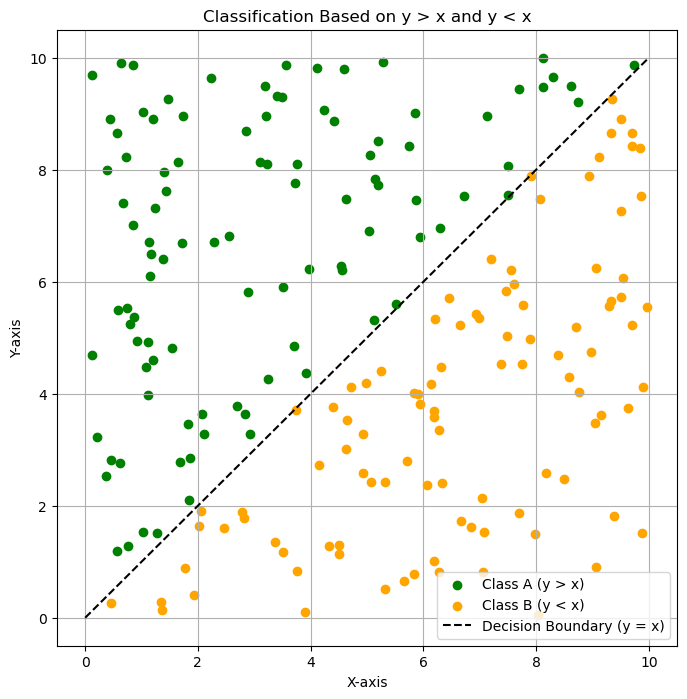

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(class_A[:, 0], class_A[:, 1], color='green', label='Class A (y > x)')
plt.scatter(class_B[:, 0], class_B[:, 1], color='orange', label='Class B (y < x)')
plt.plot([0, 10], [0, 10], color='black', linestyle='--', label='Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Classification Based on y > x and y < x')
plt.legend()
plt.grid(True)
plt.show()


## Part B: Non-Linearly Separable Data (XOR Problem)

In [8]:
def generate_xor_data(n_points=200, seed=42):
    np.random.seed(seed)
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if (x > 0.5 and y > 0.5) or (x < 0.5 and y < 0.5):
            if len(class_A) < n_points:
                class_A.append([x, y])
        else:
            if len(class_B) < n_points:
                class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

class_A_xor, class_B_xor = generate_xor_data()


Plot the data points. Try to draw a linear decision boundary. Comment on why the classes cannot be separated.

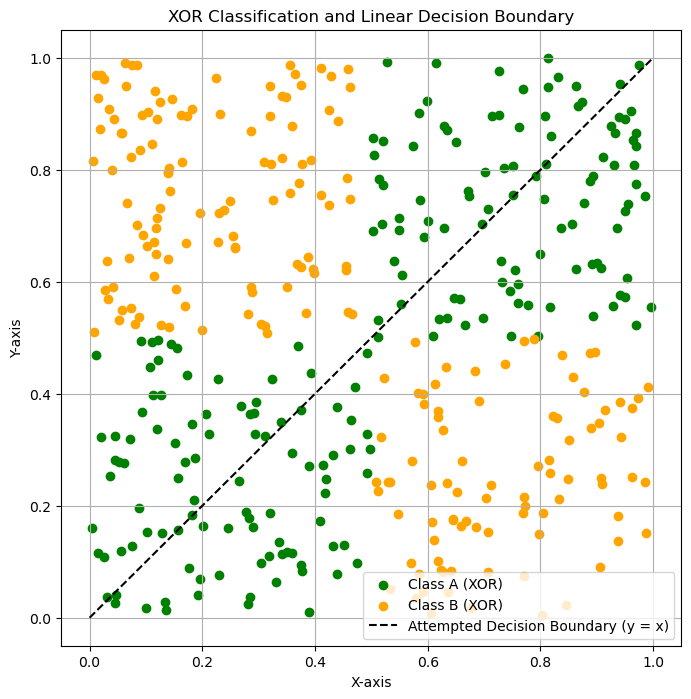

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(class_A_xor[:, 0], class_A_xor[:, 1], color='green', label='Class A (XOR)')
plt.scatter(class_B_xor[:, 0], class_B_xor[:, 1], color='orange', label='Class B (XOR)')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Attempted Decision Boundary (y = x)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('XOR Classification and Linear Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


## Part C: Non-Linearly Separable Data (Circular data points)

In [10]:
def generate_data(n_points=200, seed=42):
    np.random.seed(seed)

    # Class 0: points inside a circle with radius 5
    radius_0 = 5
    theta_0 = np.random.uniform(0, 2 * np.pi, n_points)
    r_0 = radius_0 * np.sqrt(np.random.uniform(0, 1, n_points))  # sqrt for uniform distribution
    x0 = r_0 * np.cos(theta_0)
    y0 = r_0 * np.sin(theta_0)
    class_0 = np.vstack((x0, y0)).T

    # Class 1: points in an annulus between radius 8 and 10
    inner_radius_1 = 8
    outer_radius_1 = 10
    theta_1 = np.random.uniform(0, 2 * np.pi, n_points)
    r_1 = np.sqrt(np.random.uniform(inner_radius_1**2, outer_radius_1**2, n_points))
    x1 = r_1 * np.cos(theta_1)
    y1 = r_1 * np.sin(theta_1)
    class_1 = np.vstack((x1, y1)).T

    return class_0, class_1

class_0, class_1 = generate_data()

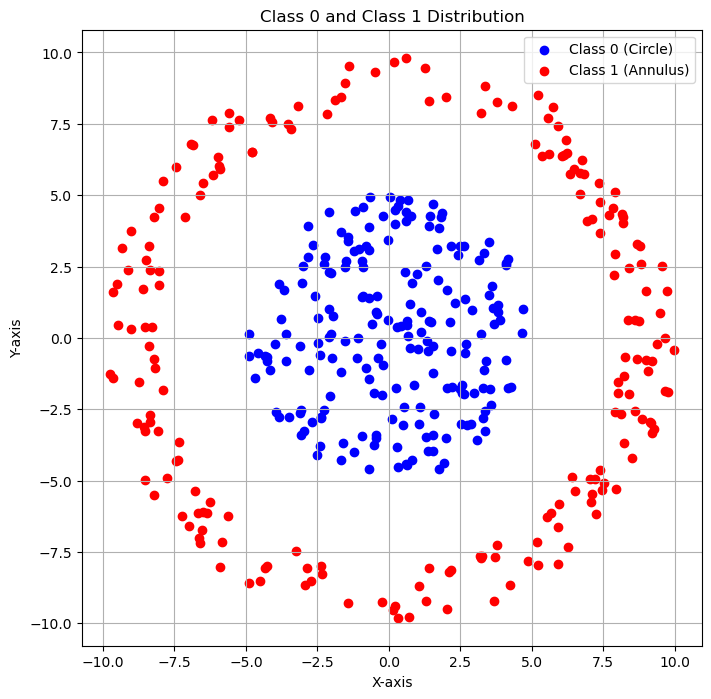

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0 (Circle)')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1 (Annulus)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Class 0 and Class 1 Distribution')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

# Section 3

In this section, we will implement a perceptron classifier from scratch.

In [13]:
class Perceptron:
    # AD: Init function runs just when an object is created based on the class. So it can get parameters as input
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.errors_ = []  # storing the number of misclassifications in each epoch

    def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_samples]
            Target values. Must be +1 or -1.
        """
        n_samples, n_features = X.shape
        # starting weights and bias equal zeros
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for epoch in range(self.n_epochs):
            errors = 0
            for idx in range(n_samples):
                linear_output = np.dot(X[idx], self.weights) + self.bias  # w^T x + b
                y_pred = self._unit_step(linear_output)
                if y[idx] != y_pred: # misclassfied
                    update = self.learning_rate * y[idx]
                    self.weights += update * X[idx]
                    self.bias += update
                    errors += 1
            self.errors_.append(errors)
            # if no errors, convergence achieved
            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        X : array-like, shape = [n_samples, n_features]

        Returns:
        array, shape = [n_samples]
            Predicted class labels.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)

    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)


In [14]:
X_ab = np.vstack((class_A, class_B))
y_ab = np.hstack((np.ones(class_A.shape[0]), -np.ones(class_B.shape[0])))

shuffle_idx = np.random.permutation(len(X_ab))
X_ab, y_ab = X_ab[shuffle_idx], y_ab[shuffle_idx]

print("Combined Data Sample Points:\n", X_ab[:5])
print("Combined Labels:\n", y_ab[:5])

Combined Data Sample Points:
 [[0.43159912 8.91143114]
 [5.74473113 8.41828777]
 [9.38340457 1.81233066]
 [1.12038902 3.97855599]
 [5.20163501 8.521815  ]]
Combined Labels:
 [ 1.  1. -1.  1.  1.]


In [18]:
perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)
perceptron.fit(X_ab, y_ab)

print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")

Converged after 8 epochs
Final Weights: [-0.43518699  0.43607194]
Final Bias: -0.01


Let us visualize the decission boundary:

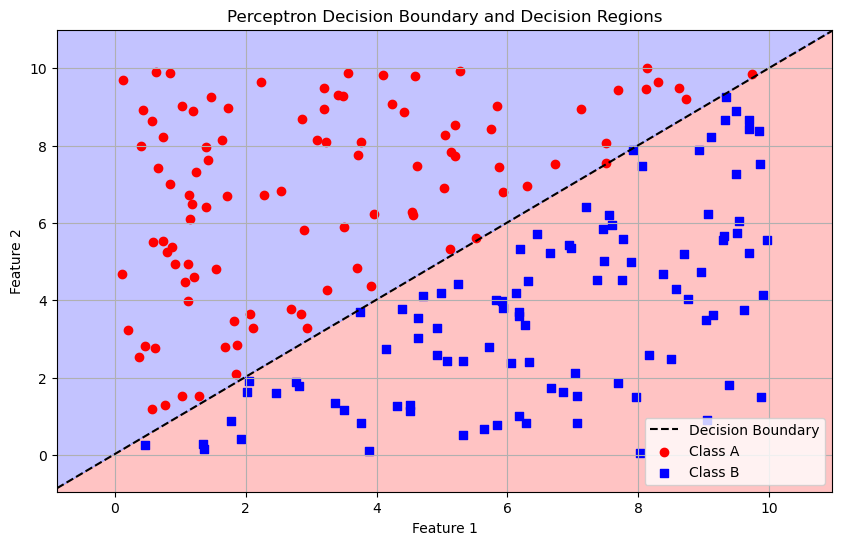

In [20]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_ab[:, 0].min() - 1, X_ab[:, 0].max() + 1
y_min, y_max = X_ab[:, 1].min() - 1, X_ab[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.7, cmap=cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.bias / perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(class_A[:, 0], class_A[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()

# Section 4

Let us revisit the breast cancer dataset again:
   - Select two features `mean radius` and `mean texture` for visualization purposes.
   - Split the dataset into training and testing sets.

In [21]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

selected_features = ['mean radius', 'mean texture']
X_selected = df[selected_features].values
y_selected = y  # 0 = malignant, 1 = benign


Split data to 80% train and 20% test:

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 455
Testing samples: 114


In [23]:
# convert labels: 0 -> -1, 1 -> 1
y_train_perceptron = np.where(y_train == 0, -1, 1)
y_test_perceptron = np.where(y_test == 0, -1, 1)


In [24]:
perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)

perceptron.fit(X_train, y_train_perceptron)

print(f"Final Weights: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")

Final Weights: [-1.63173 -0.3517 ]
Final Bias: 30.740000000002006


As you remember, samples are not linearly separable. We can expect number of misclassifications not to converge to 0:

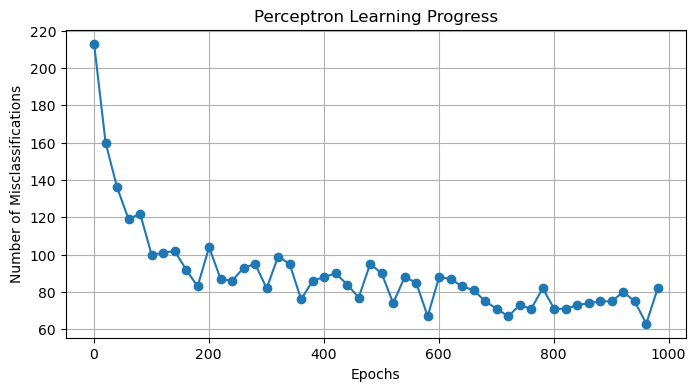

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(perceptron.errors_) + 1, 20), perceptron.errors_[::20], marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

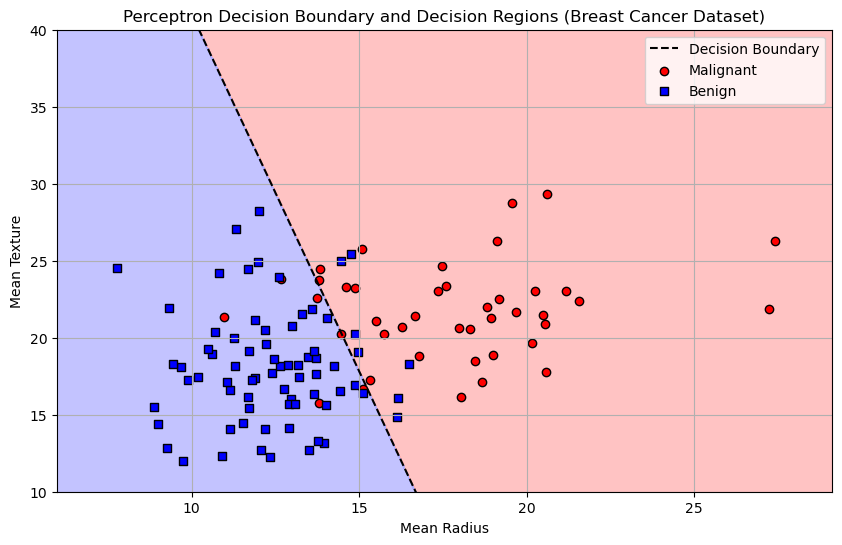

In [27]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.7, cmap=cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.bias / perceptron.weights[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

# Malignant: 0 (red), Benign: 1 (blue)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            color='red', marker='o', edgecolor='k', label='Malignant')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            color='blue', marker='s', edgecolor='k', label='Benign')

plt.ylim(10,40)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Perceptron Decision Boundary and Decision Regions (Breast Cancer Dataset)')
plt.legend()
plt.grid(True)
plt.show()